<a href="https://colab.research.google.com/github/Gaurav1401/Exploratory_Data_Analysis/blob/main/Adult_Income_Analysis/Bivariate_Analysis_Encoding_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
import warnings as wg
wg.filterwarnings('ignore')

In [ ]:
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
from scipy import stats

In [ ]:
df_3 = pd.read_csv('df_3(1).csv')

In [ ]:
test_encod = pd.read_csv('test.csv')

In [ ]:
df_3.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,64,Self-emp,213574,HS-grad,4,Married,Craft-repair,White,Male,> 0,0,10,United-States,<=50K
1,37,Government,249392,Assoc-voc,6,Married,Other-service,White,Male,0,0,40,United-States,>50K
2,50,Self-emp,192654,9th-12th,3,Unmarried,Craft-repair,White,Male,0,0,25,United-States,<=50K
3,34,Self-emp,195891,Bachelors,8,Married,Sales,White,Male,0,0,50,United-States,>50K
4,40,Government,218995,Some-college,5,Married,Exec-managerial,White,Male,0,0,42,United-States,>50K


## native-country vs gender vs age

In [ ]:
fig = px.strip(df_3, x="age", y="gender", color="income", facet_col="native-country")
fig.show(renderer="colab")

<font color = blue>**The overall distribution looks the same it doesn't look like income dependso on country and gender**</font>

# Bivariate Analysis

### Correlation b/w numerical features

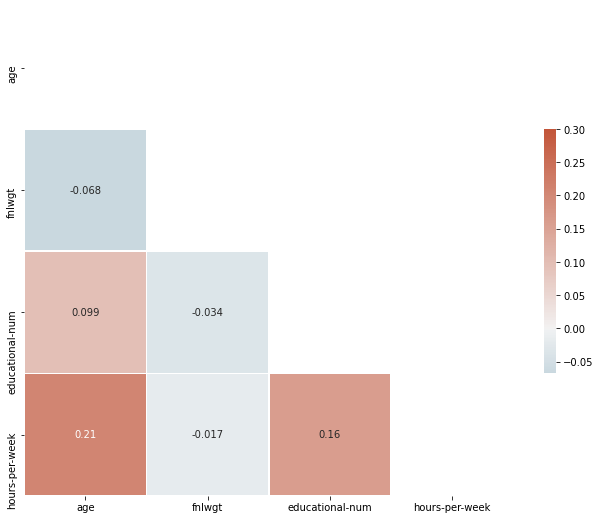

In [ ]:
mask = np.triu(np.ones_like(df_3.corr(), dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df_3.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

plt.show()

<font color = blue>**The correlation between all the features is near to zero not any features are closely correlated**</font>

### Scatterplot b/w two variables

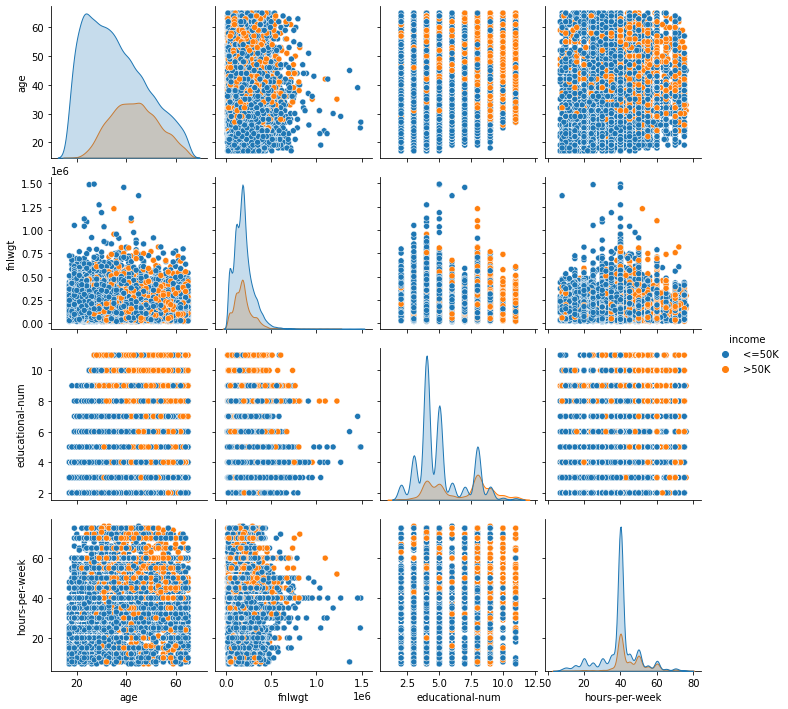

In [ ]:
sns.pairplot(df_3, hue = 'income')



*   Majority of the individuals having income more than 50K have higher education.
*   Majority of the individuals earning more than 50K are doing 30 to 55 hour work week approximately.








---

**It doesn't look like fnlwgt decides whether a person would earn less than or more than 50K**

## How income depends on occupation

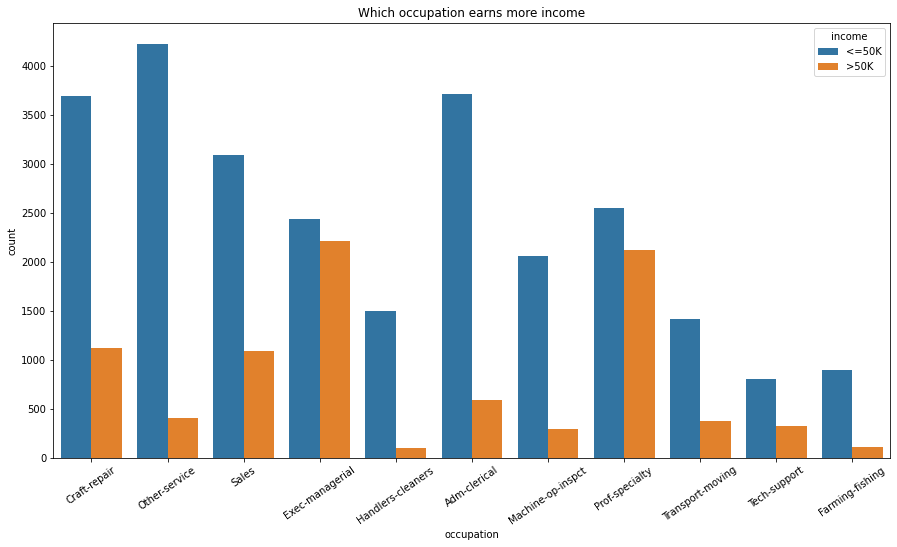

In [ ]:
plt.figure(figsize = (15, 8))
sns.countplot('occupation', data = df_3, hue = 'income')
plt.xticks(rotation=35)
plt.title('Which occupation earns more income')
plt.show()

<font color = blue>**We can clearly see that exec-manager and prof-speciality are the occupations which have many number of the people earning more than 50K**</font>

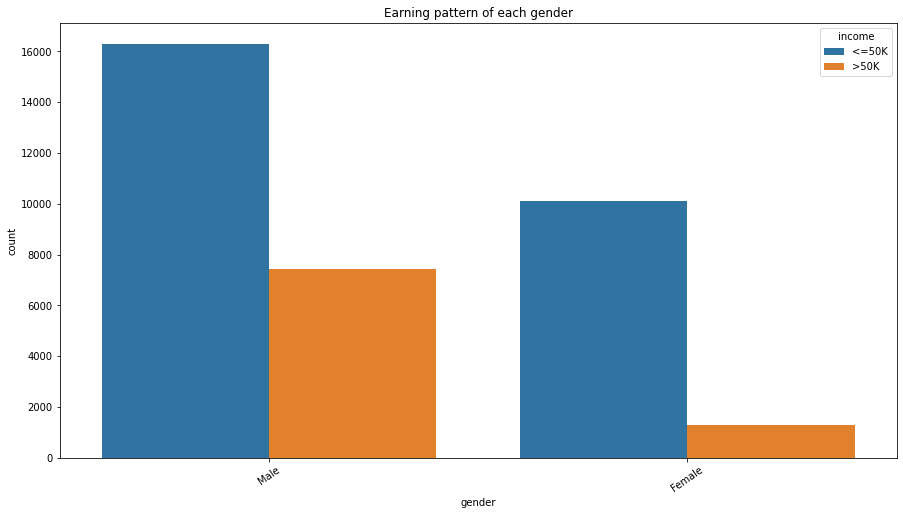

In [ ]:
plt.figure(figsize = (15, 8))
sns.countplot('gender', data = df_3, hue = 'income')
plt.xticks(rotation=35)
plt.title('Earning pattern of each gender')
plt.show()

<font color = blue>**Overall in the dataset males are in majority, so there is no doubt that even those earning more than 50K have majority of males**</font>

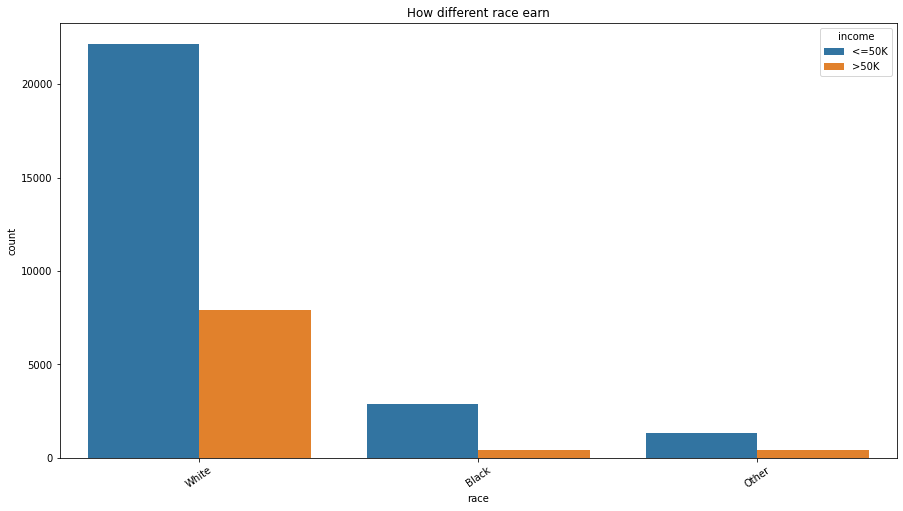

In [ ]:
plt.figure(figsize = (15, 8))
sns.countplot('race', data = df_3, hue = 'income')
plt.xticks(rotation=35)
plt.title('How different race earn')
plt.show()

<font color = blue>**Since, majority of the data belongs to white people so this might be the reason why white are earning better**</font>

### How income varies with different country people

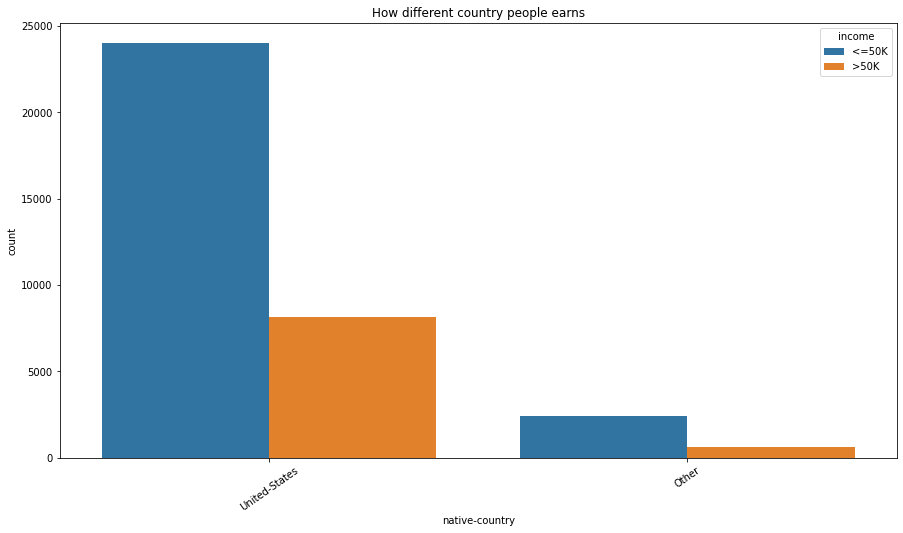

In [ ]:
plt.figure(figsize = (15, 8))
sns.countplot('native-country', data = df_3, hue = 'income')
plt.xticks(rotation=35)
plt.title('How different country people earns')
plt.show()

<font color = blue>**Since, there are more individuals from US that's why it is looking like they are earning better**</font>

### How income varies with education

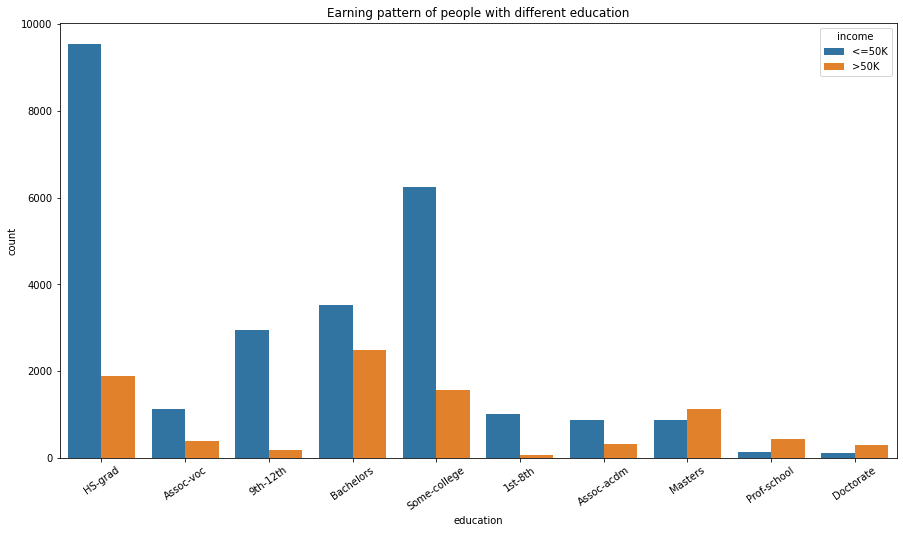

In [ ]:
plt.figure(figsize = (15, 8))
sns.countplot('education', data = df_3, hue = 'income')
plt.xticks(rotation=35)
plt.title('Earning pattern of people with different education')
plt.show()



*   Someone from higher education like bachelors,masters, Prof-school or doctrate has more chances to earn more than 50K.
*   Someone having education of 5th-12th has very rare chance to earn more than 50K.


*   Someone having education of 1st-8th have the less chances to earn more than 50K





## education vs occupation vs native-country vs gender vs income

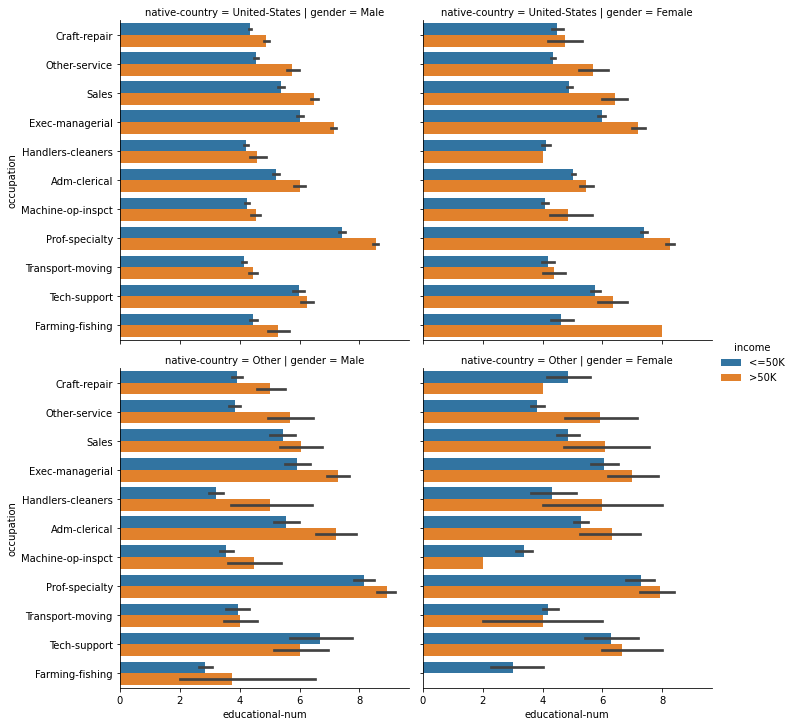

In [ ]:
#fig, ax = plt.subplots(1, 2, figsize = [16,16])
sns.catplot(x = 'educational-num', y = 'occupation',kind= 'bar',row = 'native-country',col = 'gender', data = df_3,  hue = 'income', legend_out = True)
plt.show()



*   Irrespective of the gender and native-country, if he/she is working as Prof-speciality or Adm-clerical or Exec-managerial and have higher education, then there are more chances that he or she would earn the income of more than 50K.


*   In transport-moving occupation, if a female is from other country, then she has more chances of getting the income of more than 50K even if she has lesser education than a male from other country in the same occupation.
*   There is a lot more variability in the education of a female from other country getting the income of more than 50K working in sales department. It means a woman from other country might get a better salary even if she is lesser educated in sales occupation.


*   In many of the occupations, female from other country may get the salary of more than 50K even if her education is comparatively lesser than others.

*   No female from other country, is earning more than 50K in fishing-farming.


*   Males from other country have to struggle more than others to get a good salary in the occupation of Machine-op-inspct










## race vs native-country vs education vs occupation vs income

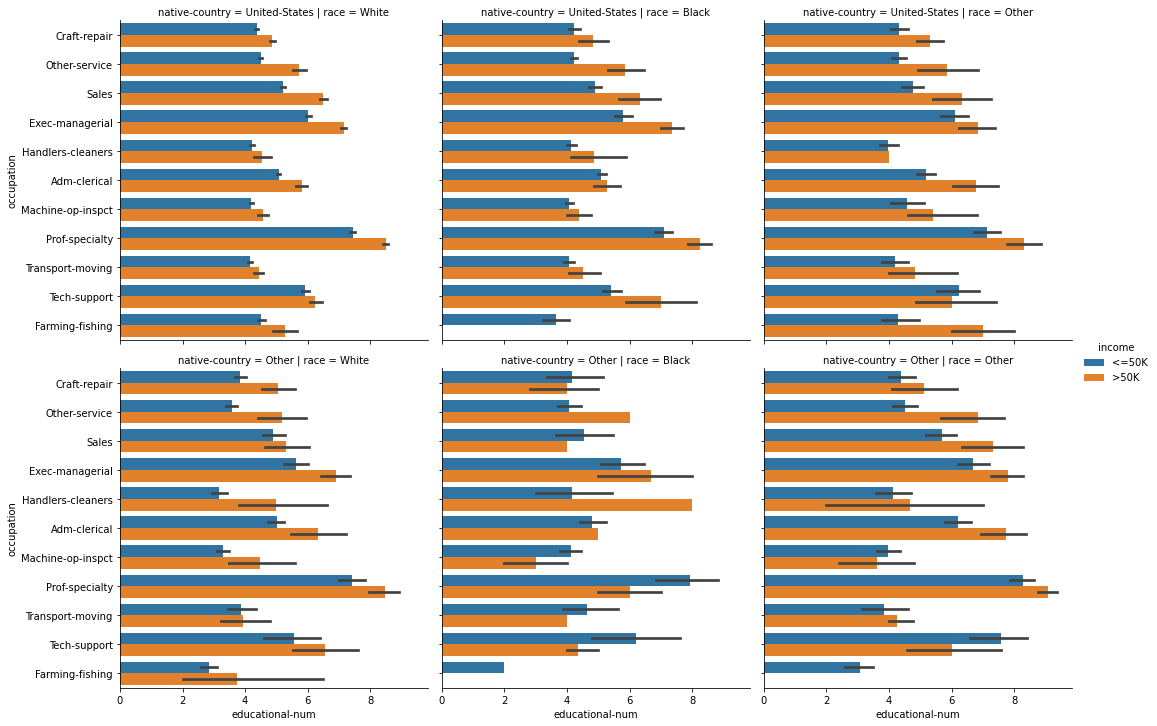

In [ ]:
sns.catplot(x = 'educational-num', y = 'occupation',kind= 'bar',row = 'native-country',col = 'race', data = df_3,  hue = 'income', legend_out = True)
sns.despine()
plt.show()



*   In the occupation of farming-fishing blacks are not getting the income of more than 50K whether they are from US or not.

*   Even to get a job of handlers-cleaners, blacks from other country require to be more educated.
*   For a job of Prof-specialty or craft-repair, blacks from other countries don't require to be much educated to get a good salary.



# education vs occupation vs gender vs race vs income

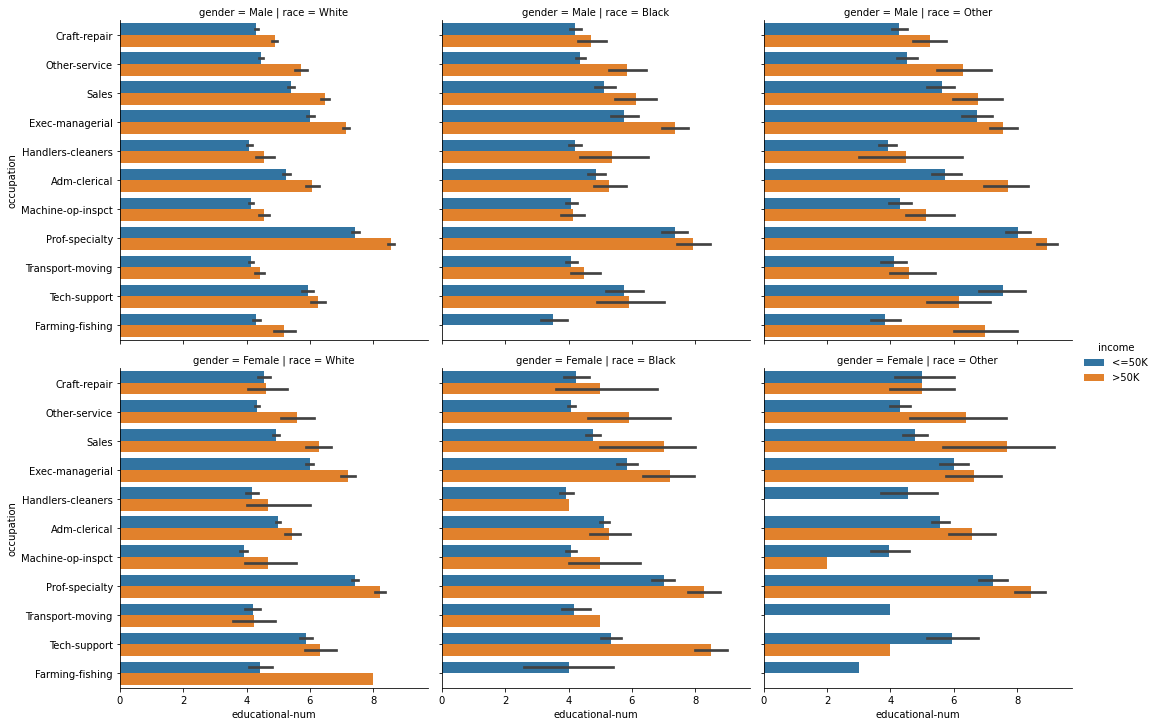

In [ ]:
sns.catplot(x = 'educational-num', y = 'occupation',kind= 'bar',row = 'gender',col = 'race', data = df_3,  hue = 'income', legend_out = True)
sns.despine()
plt.show()



*   Females of other race, are not making more income in farming-fishing, transport-moving, handlers-cleaners even after having the relevant education in comparison with others.
*   In Tech support occupation, persons of other race don't require much educations as compare to others to get the income of more than 50K.


*   In other services, people of other race require to bre more educated as compare to other to get the income of more than 50K.




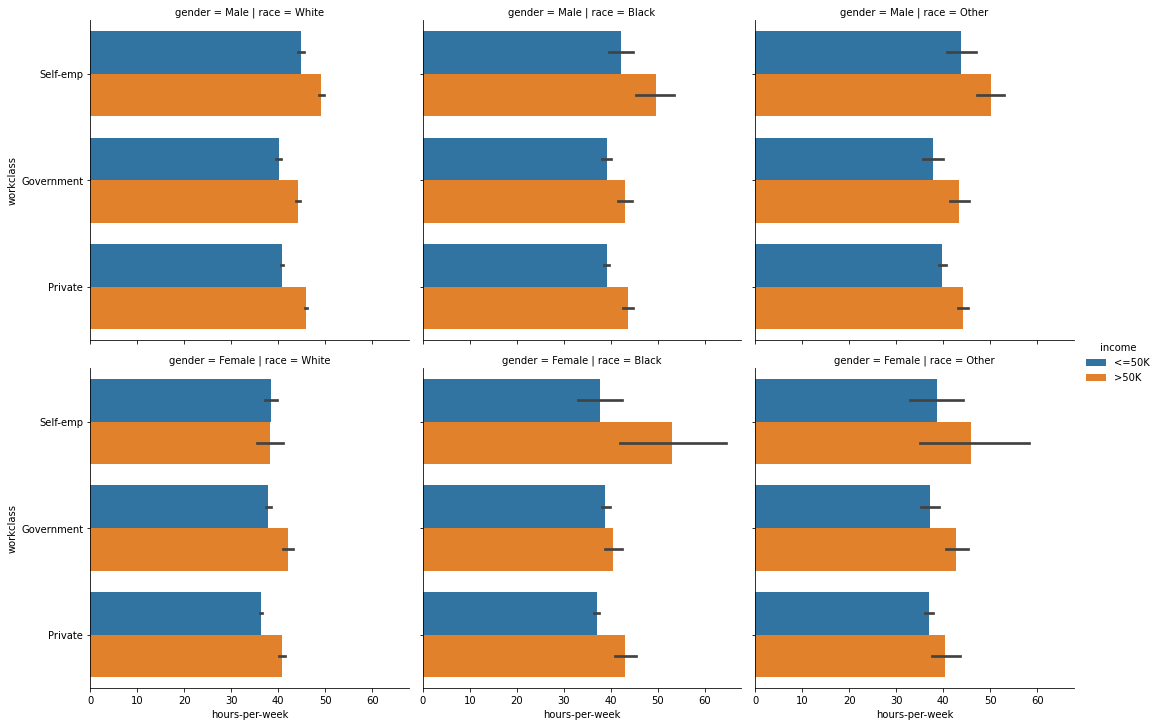

In [ ]:
sns.catplot(x = 'hours-per-week', y = 'workclass',kind= 'bar',row = 'gender',col = 'race', data = df_3,  hue = 'income', legend_out = True)
plt.show()



*   If you are not a white female, then as a self employed you will have to work like hell to get the income of more than 50K.



## Removing the fnlwgt column

In [ ]:
df_3 = df_3.drop('fnlwgt', axis='columns')

# Data Preprocessing for Machine Learning

In [ ]:
df_3.columns

Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [ ]:
num = list(df_3.select_dtypes(include=np.number).columns)

In [ ]:
num.remove('educational-num')

In [ ]:
num

['age', 'hours-per-week']

In [ ]:
df_3.shape

(35144, 13)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
for i in num:
  df_3[i] = scaler.fit_transform(df_3[[i]])

In [ ]:
df_3.head()

,age,workclass,education,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.979167,Self-emp,HS-grad,4,Married,Craft-repair,White,Male,> 0,0,0.043478,United-States,<=50K
1,0.416667,Government,Assoc-voc,6,Married,Other-service,White,Male,0,0,0.478261,United-States,>50K
2,0.687500,Self-emp,9th-12th,3,Unmarried,Craft-repair,White,Male,0,0,0.260870,United-States,<=50K
3,0.354167,Self-emp,Bachelors,8,Married,Sales,White,Male,0,0,0.623188,United-States,>50K
4,0.479167,Government,Some-college,5,Married,Exec-managerial,White,Male,0,0,0.507246,United-States,>50K


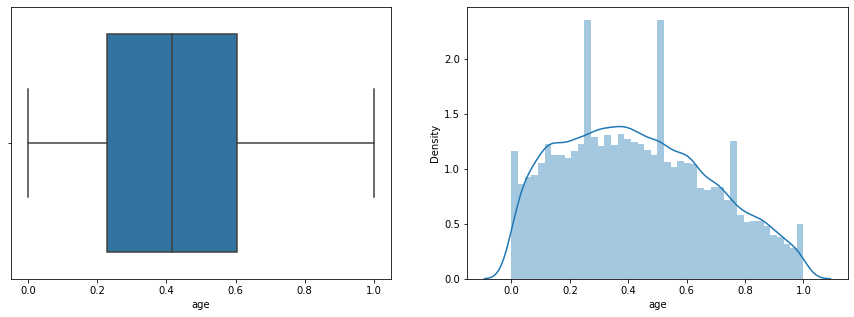

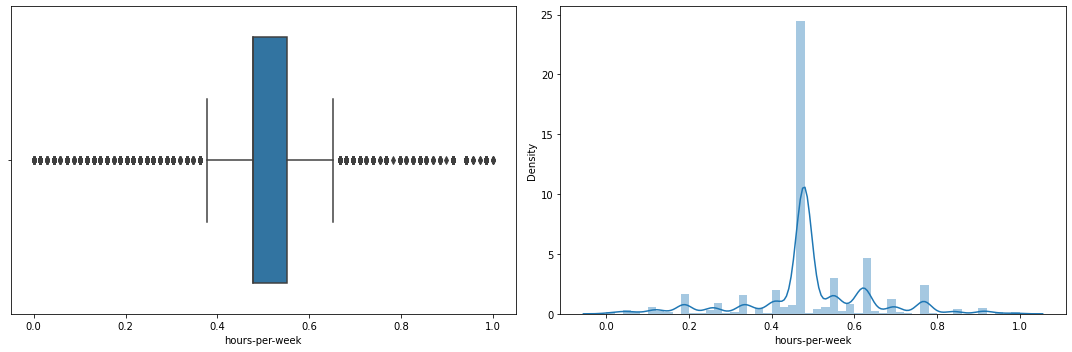

In [ ]:
for i in num:
    fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
    sns.boxplot(x = i , data = df_3, ax = axes[0])
    
    sns.distplot(df_3[i],kde = True, ax = axes[1])
    
plt.tight_layout()  
plt.show()

## Checking the normality of each numerical column

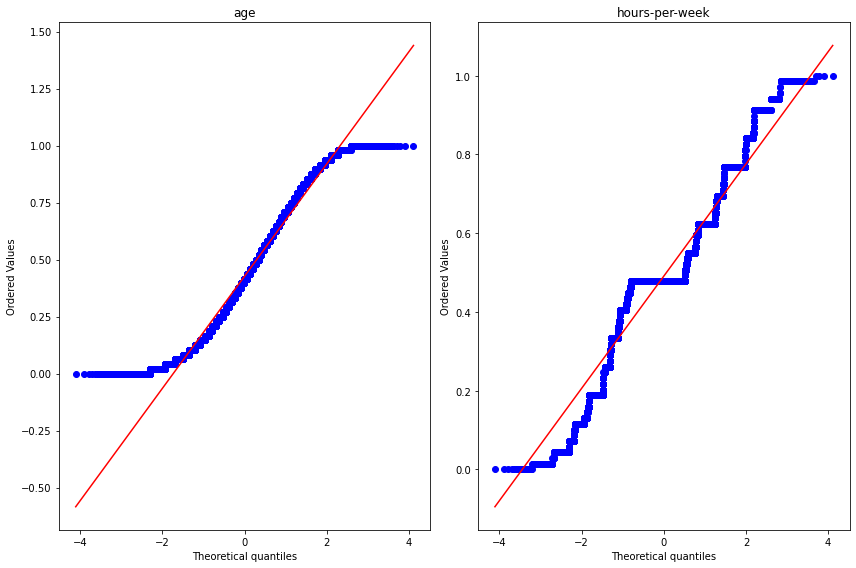

In [ ]:
# Initiating a figure
plt.figure(figsize=(12, 8))

# Creating a plot with 1 row and 2 cols

plt.subplot(1, 2, 1)
stats.probplot(df_3[num[0]], dist="norm", plot=plt)
plt.title(num[0])

plt.subplot(1, 2, 2)
stats.probplot(df_3[num[1]], dist="norm", plot=plt)
plt.title(num[1])

plt.tight_layout()
plt.show()

## Box-Cox Transformation

<font color = blue>**Many values in capital-loss and capital-gain are 0 so, box-cox can't be applied directly, due to which a constant is required to be added to both the columns**</font>

In [ ]:
for i in num:
  df_3[i] += 0.1

In [ ]:
for i in num:
  df_3[i+'_box'], l = stats.boxcox(df_3[i])

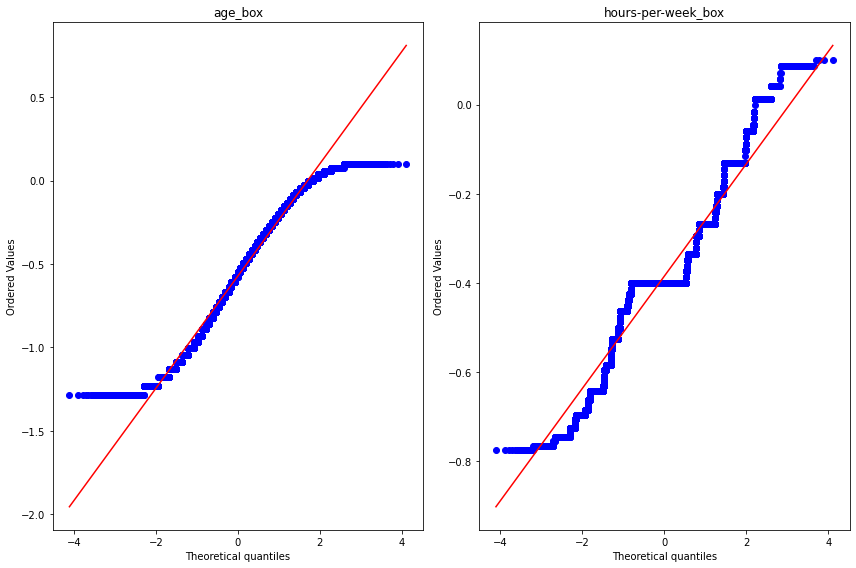

In [ ]:
# Initiating a figure
plt.figure(figsize=(12, 8))

# Creating a plot with 2 row and 2 cols

plt.subplot(1, 2, 1)
stats.probplot(df_3[num[0]+'_box'], dist="norm", plot=plt)
plt.title(num[0]+'_box')

plt.subplot(1, 2, 2)
stats.probplot(df_3[num[1]+'_box'], dist="norm", plot=plt)
plt.title(num[1]+'_box')


plt.tight_layout()
plt.show()

<font color = green>**BoxCox not working**</font>

<font color = blue>**Box-Cox is not working let's try log transformation**</font>

## Log Transformation

In [ ]:
for i in num:
  df_3[i+'_log'] = np.log(df_3[i])

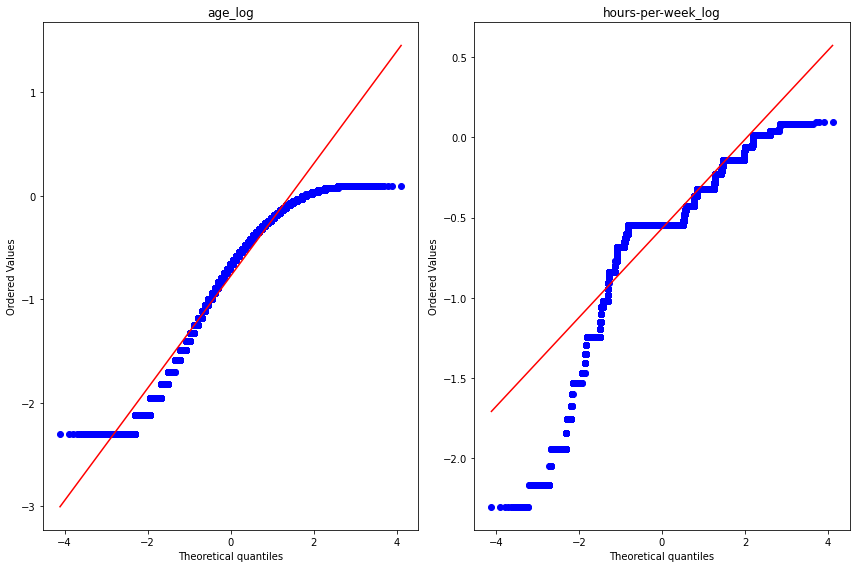

In [ ]:
# Initiating a figure
plt.figure(figsize=(12, 8))

# Creating a plot with 2 row and 2 cols

plt.subplot(1, 2, 1)
stats.probplot(df_3[num[0]+'_log'], dist="norm", plot=plt)
plt.title(num[0]+'_log')

plt.subplot(1, 2, 2)
stats.probplot(df_3[num[1]+'_log'], dist="norm", plot=plt)
plt.title(num[1]+'_log')

plt.tight_layout()
,plt.show()

<font color = blue>**As we can see here, log transformation is useless**</font>

## Yeo-Johnson Transformation

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
transformer = PowerTransformer(method = 'yeo-johnson')

for i in num:
  df_3[i+'_yj'] = transformer.fit_transform(df_3[[i]])

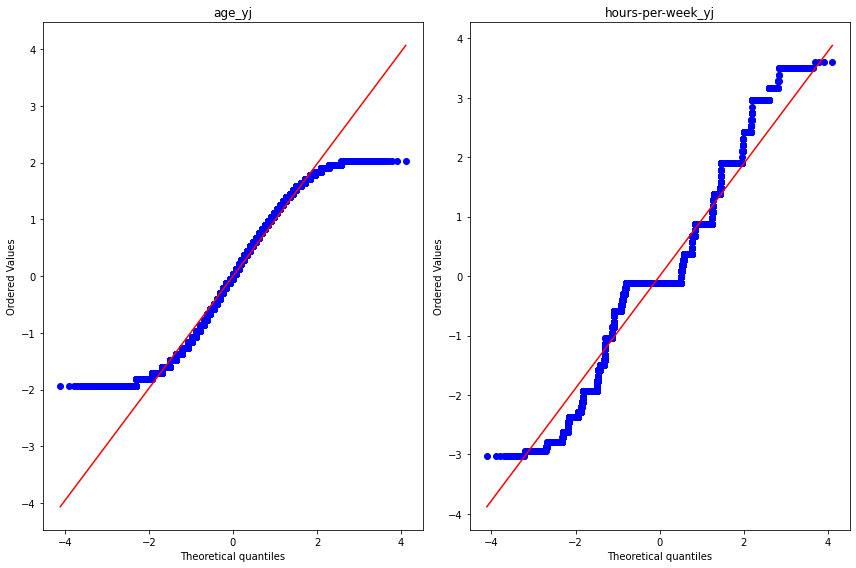

In [ ]:
# Initiating a figure
plt.figure(figsize=(12, 8))

# Creating a plot with 2 row and 2 cols

plt.subplot(1, 2, 1)
stats.probplot(df_3[num[0]+'_yj'], dist="norm", plot=plt)
plt.title(num[0]+'_yj')

plt.subplot(1, 2, 2)
stats.probplot(df_3[num[1]+'_yj'], dist="norm", plot=plt)
plt.title(num[1]+'_yj')

plt.tight_layout()
plt.show()

<font color = blue>**All transformations are producing almost the similar results so they are useless**</font>

In [ ]:
df_3['educational-num'] = scaler.fit_transform(df_3[['educational-num']])

In [ ]:
cat = list(df_3.select_dtypes(include = 'object').columns)

In [ ]:
cat.remove('education')

In [ ]:
cat

['workclass',
 'marital-status',
 'occupation',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'native-country',
 'income']

**Dropping the other transformation columns**

In [ ]:
df_4 = df_3.drop([num[0]+'_log',num[1]+'_log',
                  num[0]+'_yj',num[1]+'_yj',
                  num[0]+'_box',num[1]+'_box'], axis='columns')

In [ ]:
df_4.shape

(35144, 13)

In [ ]:
df_4.columns

Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

# Encoding

<font color = blue>**Since, we already have the numerical eduivalent of education with name educational-num so that column is not required**</font>

In [ ]:
df_4 = df_4.drop('education', axis = 'columns')

In [ ]:
for i in cat:
  print(i,'has',len(df_4[i].unique()), 'unique values')

workclass has 3 unique values
marital-status has 4 unique values
occupation has 11 unique values
race has 3 unique values
gender has 2 unique values
capital-gain has 2 unique values
capital-loss has 2 unique values
native-country has 2 unique values
income has 2 unique values


#### Label Encoding Gender

In [ ]:
df_4['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df_4['gender'] = df_4['gender'].replace(['Male', 'Female'], [1, 0]) # label encoding the categorical variables

#### Label Encoding native-country

In [ ]:
df_4['native-country'].unique()

array(['United-States', 'Other'], dtype=object)

In [ ]:
df_4['native-country'] = df_4['native-country'].replace(['United-States', 'Other'], [1, 0]) # label encoding the categorical variables

#### Label Encoding income

In [ ]:
df_4['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [ ]:
df_4['income'] = df_4['income'].replace(['<=50K', '>50K'], [0, 1]) # label encoding the categorical variables

#### Label encoding capital-gain

In [ ]:
df_4['capital-gain'].unique()

array(['> 0', '0'], dtype=object)

In [ ]:
df_4['capital-gain'] = df_4['capital-gain'].replace(['0', '> 0'], [0, 1]) # label encoding the categorical variables

#### Label encoding capital-loss

In [ ]:
df_4['capital-loss'].unique()

array(['0', '> 0'], dtype=object)

In [ ]:
df_4['capital-loss'] = df_4['capital-loss'].replace(['0', '> 0'], [0, 1]) # label encoding the categorical variables

# Dummy Encoding

In [ ]:
df_4.head()

,age,workclass,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,1.079167,Self-emp,0.222222,Married,Craft-repair,White,1,1,0,0.143478,1,0
1,0.516667,Government,0.444444,Married,Other-service,White,1,0,0,0.578261,1,1
2,0.787500,Self-emp,0.111111,Unmarried,Craft-repair,White,1,0,0,0.360870,1,0
3,0.454167,Self-emp,0.666667,Married,Sales,White,1,0,0,0.723188,1,1
4,0.579167,Government,0.333333,Married,Exec-managerial,White,1,0,0,0.607246,1,1


In [ ]:
dummy = pd.get_dummies(df_4[['workclass', 'marital-status', 'occupation', 'race']], drop_first=True)

In [ ]:
dummy.shape

(35144, 17)

In [ ]:
dummy.columns

Index(['workclass_Private', 'workclass_Self-emp', 'marital-status_Married',
       'marital-status_Separated', 'marital-status_Unmarried',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Prof-specialty', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving', 'race_Other',
       'race_White'],
      dtype='object')

<font color = blue>**From here I am creating two separate dataframes for orignial numerical encoded data and other with box-cox tranformed encoded data**</font>

In [ ]:
df_4.columns

Index(['age', 'workclass', 'educational-num', 'marital-status', 'occupation',
       'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

**Deleting the columns of object datatype**

In [ ]:
cat

['workclass',
 'marital-status',
 'occupation',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'native-country',
 'income']

In [ ]:
df_4 = df_4.drop(['marital-status', 'occupation',
       'race', 'workclass'], axis = 'columns')

In [ ]:
df_4.head()

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,1.079167,0.222222,1,1,0,0.143478,1,0
1,0.516667,0.444444,1,0,0,0.578261,1,1
2,0.787500,0.111111,1,0,0,0.360870,1,0
3,0.454167,0.666667,1,0,0,0.723188,1,1
4,0.579167,0.333333,1,0,0,0.607246,1,1


In [ ]:
original_df = df_4.copy()

**Concatinating new dataframes with dummy encoded variables**

In [ ]:
original_df = pd.concat([original_df, dummy], axis = 'columns')
#box_df = pd.concat([box_df, dummy], axis = 'columns')

In [ ]:
original_df.shape

(35144, 25)

In [ ]:
original_df.head()

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_Private,workclass_Self-emp,marital-status_Married,marital-status_Separated,marital-status_Unmarried,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Other,race_White
0,1.079167,0.222222,1,1,0,0.143478,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0.516667,0.444444,1,0,0,0.578261,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0.787500,0.111111,1,0,0,0.360870,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
3,0.454167,0.666667,1,0,0,0.723188,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0.579167,0.333333,1,0,0,0.607246,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1


<font color = blue>**Now here, i have prepared my dataset to make a ML model**</font>

**Converting these datasets to csv for ML separately**

In [ ]:
from google.colab import files

In [ ]:

original_df.to_csv('original_df.csv', index = False)         
files.download('original_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# box_df.to_csv('box_df.csv', index = False)         
# files.download('box_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Preprocessing of test-data

In [ ]:
test_encod.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,29106,Some-college,10,Unmarried,Other-service,White,Female,0,0,50,United-States,<=50K
1,18,Private,236262,9th-12th,7,Unmarried,Handlers-cleaners,White,Male,0,0,12,United-States,<=50K
2,38,Private,95647,HS-grad,9,Unmarried,Adm-clerical,Other,Male,0,0,30,United-States,<=50K
3,53,Self-emp,251675,Some-college,10,Divorced,Sales,White,Male,> 0,0,50,Other,>50K
4,52,Self-emp,162381,HS-grad,9,Divorced,Sales,White,Male,0,0,40,United-States,<=50K


In [ ]:
# Removing the two columns
test_encod = test_encod.drop(['fnlwgt','education'], axis='columns')

# feature scaling
for i in num:
  test_encod[i] = scaler.fit_transform(test_encod[[i]])

test_encod['educational-num'] = scaler.fit_transform(test_encod[['educational-num']])

# label encoding categoical col.
test_encod['gender'] = test_encod['gender'].replace(['Male', 'Female'], [1, 0])
test_encod['native-country'] = test_encod['native-country'].replace(['United-States', 'Other'], [1, 0])
test_encod['income'] = test_encod['income'].replace(['<=50K', '>50K'], [0, 1])
test_encod['capital-gain'] = test_encod['capital-gain'].replace(['0', '> 0'], [0, 1])
test_encod['capital-loss'] = test_encod['capital-loss'].replace(['0', '> 0'], [0, 1])


dummy_1 = pd.get_dummies(test_encod[['workclass', 'marital-status', 'occupation', 'race']], drop_first=True)

test_encod = pd.concat([test_encod, dummy_1], axis = 'columns')

In [ ]:
test_encod.shape

(9396, 33)

In [ ]:
test_encod.columns

Index(['age', 'workclass', 'educational-num', 'marital-status', 'occupation',
       'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'income', 'workclass_Government',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp',
       'workclass_Without-pay', 'marital-status_Married',
       'marital-status_Separated', 'marital-status_Unmarried',
       'occupation_Adm-clerical', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Prof-specialty',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'race_Other', 'race_White'],
      dtype='object')

In [ ]:
test_encod = test_encod.drop(['marital-status', 'occupation',
       'race', 'workclass'], axis = 'columns')

In [ ]:
test_col = list(test_encod.columns)

In [ ]:
original = list(original_df.columns)

In [ ]:
for i in test_col:
  if i not in original:
    test_encod.drop(i, axis = 'columns')

In [ ]:
test_encod.shape

(9396, 29)

In [ ]:
for i in test_col:
  if i not in original:
    print(i)

workclass_Government
workclass_Never-worked
workclass_Without-pay
occupation_Adm-clerical


In [ ]:
test_encod = test_encod.drop(['workclass_Government','workclass_Never-worked','workclass_Without-pay', 'occupation_Adm-clerical'], axis = 'columns')

In [ ]:
test_encod.shape

(9396, 25)

In [ ]:
test_encod.to_csv('test_encod.csv', index = False)         
files.download('test_encod.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>